In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os

# Name of the CSV file
file = '../Resources/ignore/US_Accidents_May19.csv'
df_accidents = pd.read_csv(file)

# Name of the CSV file
file2 = '../Resources/1998221.csv'
weather_days_source = pd.read_csv(file2)

In [4]:
df_clean_accidents = df_accidents

#Create columns for time
df_clean_accidents["Start_Year"] = df_clean_accidents["Start_Time"].agg(lambda x: x.split("-")[0])
df_clean_accidents["Start_Month"] = df_clean_accidents["Start_Time"].agg(lambda x: x.split("-")[1])
df_clean_accidents["Start_Hr"] = df_clean_accidents["Start_Time"].agg(lambda x: x.split()[1])
df_clean_accidents["Start_Hr"] = df_clean_accidents["Start_Hr"].agg(lambda x: x.split(":")[0])

#Remove 2015 and 2019 
df_clean_accidents = df_clean_accidents[df_clean_accidents["Start_Year"] != "2019"]
df_clean_accidents = df_clean_accidents[df_clean_accidents["Start_Year"] != "2015"]

In [6]:
# Cleaning Data for Weather Type per State

# 01 - Create relevant df with data for the weather comparison
df_weather = df_clean_accidents[['ID', 'Severity', 'Start_Time', 'City', 'County', 'State', 'Timezone',
                 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
                 'Sunrise_Sunset', 'Start_Year']]

In [7]:
# Cleaning Data for Weather Type per State

# 02 - Delete rows with Weather_Condition as null
df_weather = df_weather.dropna(subset=['Weather_Condition'])

In [8]:
# Cleaning Data for Weather Type per State

# 03 - Unique values for Weather Condition - possibility for tighter clusters?
df_weather['Weather_Condition'].value_counts()

Clear                     742981
Overcast                  329086
Mostly Cloudy             281586
Partly Cloudy             192591
Scattered Clouds          190096
                           ...  
Blowing Sand                   1
Heavy Freezing Drizzle         1
Dust Whirls                    1
Low Drifting Snow              1
Heavy Smoke                    1
Name: Weather_Condition, Length: 61, dtype: int64

In [9]:
# Cleaning Data for Weather Type per State

# 04 - Create smaller clusters of Weather Type
df_weather['Weather_Condition_Corrected'] = df_weather['Weather_Condition']
df_weather['Weather_Condition_Corrected'] = df_weather['Weather_Condition_Corrected'].replace(
    {"Mostly Cloudy": "Cloudy",
     "Partly Cloudy": "Cloudy",
     "Scattered Clouds": "Cloudy",
     "Funnel Cloud": "Cloudy",
     'Overcast': 'Cloudy',
     'Drizzle': 'Rain',
     'Light Drizzle': 'Rain',
     'Light Freezing Drizzle': 'Rain',
     'Heavy Drizzle': 'Rain',
     'Heavy Freezing Drizzle': 'Rain',
     'Widespread Dust': 'Dust',
     'Dust Whirls': 'Dust',
     'Volcanic Ash': 'Dust',
     'Sand': 'Dust',
     'Blowing Sand': 'Dust',
     'Haze': 'Fog',
     'Patches of Fog': 'Fog',
     'Light Freezing Fog': 'Fog',
     'Shallow Fog': 'Fog',
     'Light Fog': 'Fog',
     'Mist': 'Fog',
     'Small Hail': 'Hail',
     'Light Hail': 'Hail',
     'Ice Pellets': 'Hail',
     'Light Haze': 'Fog',
     'Light Ice Pellets': 'Hail',
     'Heavy Ice Pellets': 'Hail',
     'Light Rain': 'Rain',
     'Heavy Rain': 'Rain',
     'Light Thunderstorms and Rain': 'Thunderstorm',
     'Heavy Thunderstorms and Rain': 'Thunderstorm',
     'Thunderstorms and Rain': 'Thunderstorm',
     'Light Freezing Rain': 'Rain',
     'Light Rain Showers': 'Rain',
     'Rain Showers': 'Rain',
     'Heavy Rain Showers': 'Rain',
     'Snow Grains': 'Snow',
     'Light Snow Grains': 'Snow',
     'Heavy Freezing Rain': 'Rain',
     'Heavy Smoke': 'Smoke',
     'Light Snow': 'Snow',
     'Heavy Snow': 'Snow',
     'Blowing Snow': 'Snow',
     'Light Snow Showers': 'Snow',
     'Light Thunderstorms and Snow': 'Snow',
     'Low Drifting Snow': 'Snow',
     'Heavy Thunderstorms and Snow': 'Snow',
     'Thunderstorms and Snow': 'Snow',
     'Heavy Blowing Snow': 'Snow',
     'Light Blowing Snow': 'Snow',
     'Snow Showers': 'Snow',
     'Heavy Thunderstorms with Small Hail': 'Thunderstorm',
     'Light Thunderstorm': 'Thunderstorm'
    })

df_weather['Weather_Condition_Corrected'].value_counts()

Cloudy          993376
Clear           742981
Rain            132625
Fog              39841
Snow             29742
Thunderstorm     13740
Smoke             2961
Hail               297
Dust               147
Squalls             22
Name: Weather_Condition_Corrected, dtype: int64

In [10]:
# Create Chart Weather and State of Accidents (2016-2018)

# 01 - DF with Weather Condition, State and counts
df_weather_state = pd.DataFrame(df_weather.groupby(['Weather_Condition_Corrected','State'])['ID'].count().reset_index())


In [13]:
# Create Chart Weather and State of Accidents (2016-2018)

# 02 - DF to add percentages of each Weather Type in the Chart
df_weather_global = pd.DataFrame(df_weather.groupby(['Weather_Condition_Corrected'])['ID'].count().reset_index())
df_weather_global['Percent'] = ((df_weather_global['ID'] / df_weather_global['ID'].sum()) * 100).round(1)
df_weather_global

,Weather_Condition_Corrected,ID,Percent
0,Clear,742981,38.0
1,Cloudy,993376,50.8
2,Dust,147,0.0
3,Fog,39841,2.0
4,Hail,297,0.0
5,Rain,132625,6.8
6,Smoke,2961,0.2
7,Snow,29742,1.5
8,Squalls,22,0.0
9,Thunderstorm,13740,0.7


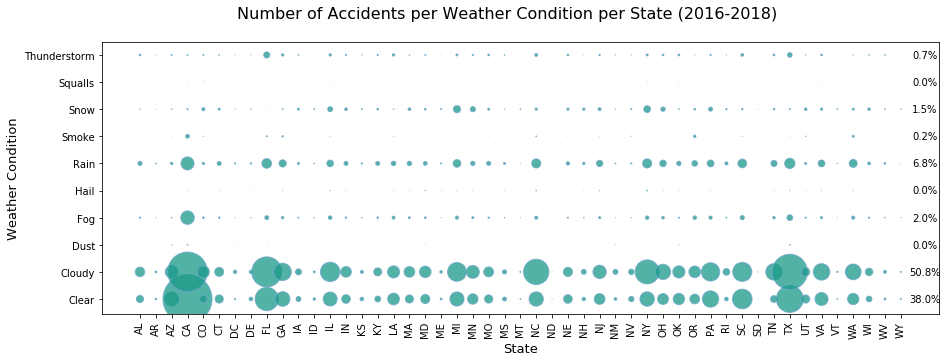

In [48]:
# Create Chart Weather and State of Accidents (2016-2018)

# 03 - Create chart for Weather Condition per State

fig = plt.figure(figsize=(15,5))
st = fig.suptitle('Number of Accidents per Weather Condition per State (2016-2018)', fontsize=16)

x_axis = list(df_weather_state['State'])
data = list(df_weather_state['Weather_Condition_Corrected'])
size = [i / 100 for i in list(df_weather_state['ID'])]

plt.scatter(x_axis, data, marker="o", facecolors="#1a9988", edgecolors="#6aa4c8",
            s=size, alpha=0.75)
plt.xticks(rotation="vertical")
plt.xlabel("State", fontsize=13)
plt.ylabel("Weather Condition", fontsize=13)
plt.tight_layout

# Add percentages on the right side of the chart
heights = list(df_weather_global['Percent'])

for i in range(0,len(heights)):
    plt.text(49.5, i, '{}%'.format(heights[i]), horizontalalignment='center', verticalalignment='center')

# Save Chart in png
plt.savefig("Outputs/State_per_weather_condition.png")



In [11]:
# Cleaning Weather Days_source

# 01 - checking the column names
weather_days_source.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT07', 'WT07_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES', 'WT09',
       'WT09_ATTRIBUTES'],
      dtype='object')

In [12]:
# Cleaning Weather Days_source

# 02 - extracting the needed columns
weather_days_dv_ri_sf = weather_days_source[['NAME', 'DATE', 'PRCP', 'SNOW', 'WT01', 'WT02', 
                                               'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09']]

In [13]:
# Cleaning Weather Days_source

# 03 - creating Year column
weather_days_dv_ri_sf["YEAR"] = weather_days_dv_ri_sf["DATE"].agg(lambda x: x.split("-")[0])

# 04 - creating columns to access which type of weather do we have
weather_days_dv_ri_sf['PRCP_calc'] = ''
weather_days_dv_ri_sf['SNOW_calc'] = ''
weather_days_dv_ri_sf['Weather_cond'] = ''

In [14]:
# Cleaning Weather Days_source

# 05 - Label Snowy and Rainy days
for i in range(0,len(weather_days_dv_ri_sf)):

    if weather_days_dv_ri_sf.iloc[i,2] > 0.0:
        weather_days_dv_ri_sf.iloc[i,14] = 'y'
    else: 
        weather_days_dv_ri_sf.iloc[i,14] = 'n'
        
    if weather_days_dv_ri_sf.iloc[i,3] > 0.0:
        weather_days_dv_ri_sf.iloc[i,15] = 'y'
    else: 
        weather_days_dv_ri_sf.iloc[i,15] = 'n'

In [15]:
# Cleaning Weather Days_source

# 06 - Final labeling of different weather types

for i in range(0,len(weather_days_dv_ri_sf)):

# Code -> Official Description for Weather Type -> Our Weather Type
# WT01 -> Fog, ice fog, or freezing fog (may include heavy fog) -> Fog
# WT02 -> Heavy fog or heaving freezing fog (not always distinguished from fog) -> Fog
# WT03 -> Thunder -> Thunder
# WT04 -> Ice pellets, sleet, snow pellets, or small hail -> Hail
# WT05 -> Hail (may include small hail) -> Hail
# WT06 -> Glaze or rime -> Snow
# WT07 -> Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction -> Dust
# WT08 -> Smoke or haze -> Smoke
# WT09 -> Blowing or drifting snow -> Snow

    
# Based on the existance of snow (WT06 and WT09 and SNOW = Snow)
    if (weather_days_dv_ri_sf.iloc[i,9] > 0 or weather_days_dv_ri_sf.iloc[i,12] > 0 or weather_days_dv_ri_sf.iloc[i,15] == 'y'):
        weather_days_dv_ri_sf.iloc[i,16] = 'Snow'

# Based on the existance of thunderstorm (WT03 = Thunder)
    elif weather_days_dv_ri_sf.iloc[i,6] > 0:
        weather_days_dv_ri_sf.iloc[i,16] = 'Thunderstorm'

# Based on the existance of rain (PRCP = Rain)
    elif weather_days_dv_ri_sf.iloc[i,14] == 'y':
        weather_days_dv_ri_sf.iloc[i,16] = 'Rain'

# Based on the existance of hail (WT04 and WT05 = Hail)
    elif (weather_days_dv_ri_sf.iloc[i,7] > 0 or weather_days_dv_ri_sf.iloc[i,8] > 0):
        weather_days_dv_ri_sf.iloc[i,16] = 'Hail'

# Based on the existance of fog (WT01 and WT02 = Fog)
    elif (weather_days_dv_ri_sf.iloc[i,4] > 0 or weather_days_dv_ri_sf.iloc[i,5] > 0):
        weather_days_dv_ri_sf.iloc[i,16] = 'Fog'

# Based on the existance of fog (WT07 = Dust)
    elif weather_days_dv_ri_sf.iloc[i,10] > 0:
        weather_days_dv_ri_sf.iloc[i,16] = 'Dust'

# Based on the existance of fog (WT08 = Smoke)
    elif weather_days_dv_ri_sf.iloc[i,11] > 0:
        weather_days_dv_ri_sf.iloc[i,16] = 'Smoke'
    
# All the remaining should be Clear/Cloudy
    else:
        weather_days_dv_ri_sf.iloc[i,16] = 'Clear/Cloudy'

In [16]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 01 - Create DF with days of weather condition per year and per city

weather_days_summary = pd.DataFrame(weather_days_dv_ri_sf.groupby(['NAME', 'YEAR', 'Weather_cond'])['DATE'].count().reset_index())
weather_days_summary.rename(columns={'DATE': 'Count'}, inplace = True)
weather_days_summary_final = pd.DataFrame(weather_days_summary.pivot_table(columns = 'YEAR', index = ('NAME', 'Weather_cond'), values = 'Count').reset_index())
weather_days_summary_final['NAME'] = weather_days_summary_final['NAME'].replace({'DENVER INTERNATIONAL AIRPORT, CO US': 'Denver',
                                            'PROVIDENCE, RI US': 'RI',
                                            'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US': 'San Francisco'})

weather_denver_pre = weather_days_summary_final.loc[weather_days_summary_final['NAME'] == 'Denver']
weather_denver = weather_denver_pre[['Weather_cond', '2016', '2017', '2018']].set_index('Weather_cond')

weather_ri_pre = weather_days_summary_final.loc[weather_days_summary_final['NAME'] == 'RI']
weather_ri = weather_ri_pre[['Weather_cond', '2016', '2017', '2018']].set_index('Weather_cond')

weather_sf_pre = weather_days_summary_final.loc[weather_days_summary_final['NAME'] == 'San Francisco']
weather_sf = weather_sf_pre[['Weather_cond', '2016', '2017', '2018']].set_index('Weather_cond')

YEAR,NAME,Weather_cond,2016,2017,2018
0,Denver,Clear/Cloudy,236.0,217.0,215.0
1,Denver,Dust,1.0,3.0,3.0
2,Denver,Fog,22.0,36.0,33.0
3,Denver,Rain,21.0,30.0,27.0
4,Denver,Smoke,4.0,7.0,8.0
5,Denver,Snow,21.0,17.0,25.0
6,Denver,Thunderstorm,61.0,55.0,54.0
7,RI,Clear/Cloudy,201.0,168.0,170.0
8,RI,Fog,39.0,52.0,53.0
9,RI,Hail,1.0,1.0,NaN


In [132]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 02 - Create unique DF with combines days of weather condition per year and per city and number of accidents per
# and per city

# 021 - Create filter for the 3 places to check
df_weather_den_sfo_ri = df_weather[((df_weather['City'] == 'Denver') & (df_weather['State'] == 'CO')) | 
                                (df_weather['City'] == 'San Francisco') |
                                (df_weather['State'] == 'RI')]

# 022 - Merge Clear and Cloudy and prepare table to merge with weather_days_summary_final
df_weather_den_sfo_ri['Weather_Condition_Corrected2'] = df_weather_den_sfo_ri['Weather_Condition_Corrected']
df_weather_den_sfo_ri['Weather_Condition_Corrected2'] = df_weather_den_sfo_ri['Weather_Condition_Corrected2'].replace(
    {"Clear": "Clear/Cloudy",
     "Cloudy": "Clear/Cloudy"})
df_weather_den_sfo_ri.rename(columns={'State': 'NAME'}, inplace = True)
df_weather_den_sfo_ri['NAME'] = df_weather_den_sfo_ri['NAME'].replace({'CO': 'Denver',
                                            'CA': 'San Francisco'})

df_weather_den_sfo_ri = pd.DataFrame(df_weather_den_sfo_ri.groupby(['Weather_Condition_Corrected2',
                                                            'Start_Year', 'NAME'])['ID'].count().reset_index())
df_weather_den_sfo_ri_trans = pd.DataFrame(df_weather_den_sfo_ri.pivot_table(index=('Weather_Condition_Corrected2', 'NAME'), 
                                                        columns='Start_Year', values='ID').reset_index())

# 023 - Merge with table weather_days_summary_final
df_weather_den_sfo_ri_norm = df_weather_den_sfo_ri_trans.merge(weather_days_summary_final, 
                                                               left_on=['Weather_Condition_Corrected2','NAME'],
                                                               right_on=['Weather_cond', 'NAME'],
                                                               suffixes=('_acc', '_days'),
                                                               how='outer')

# 024 - Normalize the accidents per day of weather type
df_weather_den_sfo_ri_norm['2016_norm'] = df_weather_den_sfo_ri_norm['2016_acc'] / df_weather_den_sfo_ri_norm['2016_days']
df_weather_den_sfo_ri_norm['2017_norm'] = df_weather_den_sfo_ri_norm['2017_acc'] / df_weather_den_sfo_ri_norm['2017_days']
df_weather_den_sfo_ri_norm['2018_norm'] = df_weather_den_sfo_ri_norm['2018_acc'] / df_weather_den_sfo_ri_norm['2018_days']

df_weather_den_sfo_ri_norm['Weather_Type'] = ''

for i in range(0,len(df_weather_den_sfo_ri_norm)):
    if df_weather_den_sfo_ri_norm.iloc[i,0] == df_weather_den_sfo_ri_norm.iloc[i,5]:
        df_weather_den_sfo_ri_norm.iloc[i,12] = df_weather_den_sfo_ri_norm.iloc[i,0]
    elif pd.isnull(df_weather_den_sfo_ri_norm.iloc[i,0]):
        df_weather_den_sfo_ri_norm.iloc[i,12] = df_weather_den_sfo_ri_norm.iloc[i,5]
    else:
        df_weather_den_sfo_ri_norm.iloc[i,12] = df_weather_den_sfo_ri_norm.iloc[i,0]
        
df_weather_den_sfo_ri_norm = df_weather_den_sfo_ri_norm[['Weather_Type', 'NAME', '2016_acc', '2017_acc',
       '2018_acc', '2016_days', '2017_days', '2018_days', '2016_norm', '2017_norm', '2018_norm']]

# 025 - Delete irrelevant rows
df_weather_den_sfo_ri_norm['WT_times'] = ''

for i in range(0,len(df_weather_den_sfo_ri_norm)):
    df_weather_den_sfo_ri_norm.iloc[i,11] = df_weather_den_sfo_ri_norm.loc[df_weather_den_sfo_ri_norm['Weather_Type'] == df_weather_den_sfo_ri_norm.iloc[i,0], 'Weather_Type'].count()

index_rows = df_weather_den_sfo_ri_norm[(df_weather_den_sfo_ri_norm['WT_times'] == 1) & (np.isnan(df_weather_den_sfo_ri_norm['2018_norm']))].index

df_weather_den_sfo_ri_norm.drop(index_rows , inplace=True)

df_weather_den_sfo_ri_norm.sort_values(by=['Weather_Type'], inplace = True)

df_weather_den_sfo_ri_norm.reset_index(drop = True, inplace = True)

,Weather_Type,NAME,2016_acc,2017_acc,2018_acc,2016_days,2017_days,2018_days,2016_norm,2017_norm,2018_norm,WT_times
0,Clear/Cloudy,Denver,374.0,2456.0,5407.0,236.0,217.0,215.0,1.584746,11.317972,25.148837,3
1,Clear/Cloudy,RI,1164.0,2098.0,2618.0,201.0,168.0,170.0,5.791045,12.488095,15.400000,3
2,Clear/Cloudy,San Francisco,1592.0,1770.0,1805.0,257.0,248.0,254.0,6.194553,7.137097,7.106299,3
3,Fog,Denver,3.0,44.0,51.0,22.0,36.0,33.0,0.136364,1.222222,1.545455,3
4,Fog,RI,14.0,40.0,41.0,39.0,52.0,53.0,0.358974,0.769231,0.773585,3
5,Fog,San Francisco,5.0,24.0,68.0,30.0,18.0,35.0,0.166667,1.333333,1.942857,3
6,Rain,RI,156.0,351.0,434.0,89.0,106.0,97.0,1.752809,3.311321,4.474227,3
7,Rain,San Francisco,58.0,150.0,115.0,62.0,61.0,52.0,0.935484,2.459016,2.211538,3
8,Rain,Denver,2.0,100.0,110.0,21.0,30.0,27.0,0.095238,3.333333,4.074074,3
9,Smoke,RI,NaN,NaN,NaN,3.0,4.0,1.0,NaN,NaN,NaN,3


In [133]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 03 - Create table for each location to have each data for each bar series in the bar chart

df_weather_sf_trans_norm = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['NAME'] == 'San Francisco']
df_weather_denver_trans_norm = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['NAME'] == 'Denver']
df_weather_ri_trans_norm = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['NAME'] == 'RI']

,Weather_Type,NAME,2016_acc,2017_acc,2018_acc,2016_days,2017_days,2018_days,2016_norm,2017_norm,2018_norm,WT_times
2,Clear/Cloudy,San Francisco,1592.0,1770.0,1805.0,257.0,248.0,254.0,6.194553,7.137097,7.106299,3
5,Fog,San Francisco,5.0,24.0,68.0,30.0,18.0,35.0,0.166667,1.333333,1.942857,3
7,Rain,San Francisco,58.0,150.0,115.0,62.0,61.0,52.0,0.935484,2.459016,2.211538,3
11,Smoke,San Francisco,NaN,NaN,10.0,13.0,29.0,23.0,NaN,NaN,0.434783,3
14,Snow,San Francisco,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3
17,Thunderstorm,San Francisco,NaN,1.0,NaN,3.0,9.0,1.0,NaN,0.111111,NaN,3


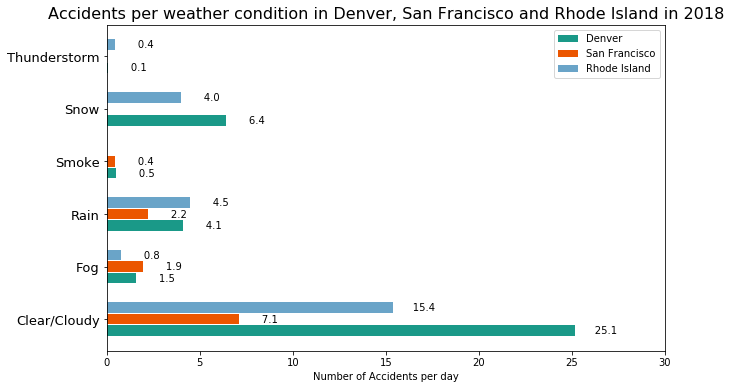

In [136]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 04 - Create Chart

width = 0.2  # the width of the bars
x = np.arange(len(df_weather_denver_trans_norm['Weather_Type']))  # the label locations
labels = df_weather_denver_trans_norm['Weather_Type']

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.barh(x - width*1.1, list(df_weather_denver_trans_norm['2018_norm']), width, label='Denver', color="#1a9988")
rects2 = ax.barh(x , list(df_weather_sf_trans_norm['2018_norm']), width, label='San Francisco', color="#eb5600")
rects3 = ax.barh(x + width*1.1, list(df_weather_ri_trans_norm['2018_norm']), width, label='Rhode Island', color="#6aa4c8")

ax.set_xlabel('Number of Accidents per day')
ax.set_title('Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018', fontsize=16)
ax.set_yticks(x)
ax.set_xticks(np.arange(0,31,5))
ax.set_yticklabels(labels, fontsize=13)
ax.legend(loc = 'upper right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{0:10.1f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(1, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig("Outputs/Accidents_per_weather_condition_Denver_SF_RI.png", bbox_inches='tight')